Import libraries

In [27]:
import cenpy as cen
import numpy as np
import pandas as pd
import pysal
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

## Establish a Connection to a U.S. Census API

In [2]:
# Identify all of the available US Census Bureau API's
datasets = list(cen.explorer.available(verbose=True).items())

# Display the DataFrame
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(datasets))

,0,1
0,NONEMP2007,2007 Nonemployer Statistics: Non Employer Stat...
1,POPESTagesex,Vintage 2014 Population Estimates: National An...
2,ZBPTotal2011,2011 County Business Patterns - Zip Code Busin...
3,ITMONTHLYIMPORTSUSDA,TEST Time Series International Trade: Monthly ...
4,POPESTnatmonthly2015,Vintage 2015 Population Estimates: National Mo...
5,POPESTcochar62014,Vintage 2014 Population Estimates: County Popu...
6,ACSST1Y2011,BETA ACS 1-Year Subject Tables
7,ITMONTHLYEXPORTSHITECH,Time Series International Trade: Monthly U.S. ...
8,ZBPTotal2013,2013 County Business Patterns - Zip Code Busin...
9,EconCensusEWKS2007,2007 Economic Census - All Sectors: Economy-Wi...


In [50]:
# Select Data Profiles dataset
datasetDP = 'ACSDP5Y2017'
cen.explorer.explain(dataset)

{'ACS 5-Year Data Profiles': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The data profiles include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Data profiles contain broad social, economic, housing, and demographic information. The data are presented as both counts and percentages. There are over 2,400 variables in this dataset.'}

In [51]:
# Establish a connection with the desired APA
conDP = cen.base.Connection(datasetDP)
conDP

Connection to ACS 5-Year Data Profiles (ID: https://api.census.gov/data/id/ACSDP5Y2017)

In [53]:
# Select Subject Tables dataset
datasetST = 'ACSST5Y2017'
cen.explorer.explain(datasetST)

{'ACS 5-Year Subject Tables': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The subject tables include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Subject tables provide an overview of the estimates available in a particular topic.  The data are presented as both counts and percentages.  There are over 66,000 variables in this dataset.'}

In [54]:
# Establish a connection with the desired APA
conDP = cen.base.Connection(datasetDP)
conDP

Connection to ACS 5-Year Data Profiles (ID: https://api.census.gov/data/id/ACSDP5Y2017)

## Access U.S. Census Population Data

In [45]:
# Select all tracts in New Jersey
g_unit = 'tract'
g_filter = {'state':'34'}

In [46]:
con.variables

,attributes,concept,group,label,limit,predicateOnly,predicateType,required,values
for,NaN,Census API Geography Specification,N/A,Census API FIPS 'for' clause,0,True,fips-for,NaN,NaN
in,NaN,Census API Geography Specification,N/A,Census API FIPS 'in' clause,0,True,fips-in,NaN,NaN
ucgid,NaN,Census API Geography Specification,N/A,Uniform Census Geography Identifier clause,0,True,ucgid,NaN,NaN
DP02_0068PE,"DP02_0068PM,DP02_0068PMA,DP02_0068PEA",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,DP02,Percent Estimate!!VETERAN STATUS!!Civilian pop...,0,NaN,int,NaN,NaN
DP04_0009E,"DP04_0009M,DP04_0009MA,DP04_0009EA",SELECTED HOUSING CHARACTERISTICS,DP04,Estimate!!UNITS IN STRUCTURE!!Total housing un...,0,NaN,int,NaN,NaN
DP03_0123E,"DP03_0123M,DP03_0123MA,DP03_0123EA",SELECTED ECONOMIC CHARACTERISTICS,DP03,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WH...,0,NaN,float,NaN,NaN
DP02_0069E,"DP02_0069M,DP02_0069MA,DP02_0069EA",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,DP02,Estimate!!VETERAN STATUS!!Civilian population ...,0,NaN,int,NaN,NaN
DP02PR_0026E,"DP02PR_0026M,DP02PR_0026MA,DP02PR_0026EA",SELECTED SOCIAL CHARACTERISTICS IN PUERTO RICO,DP02PR,Estimate!!MARITAL STATUS!!Males 15 years and o...,0,NaN,int,NaN,NaN
DP02_0147PE,"DP02_0147PM,DP02_0147PMA,DP02_0147PEA",SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,DP02,Percent Estimate!!ANCESTRY!!Total population!!...,0,NaN,float,NaN,NaN
DP04_0040PE,"DP04_0040PM,DP04_0040PMA,DP04_0040PEA",SELECTED HOUSING CHARACTERISTICS,DP04,Percent Estimate!!BEDROOMS!!Total housing unit...,0,NaN,float,NaN,NaN


In [49]:
# Select all econmic characteristics
cols = con.varslike('DP03_\S+')

## Plot TIGER shapefile

In [3]:
# Determine what Topologically Integrated Geopgrahic Encoding and Referencing (TIGER) data is available
cen.tiger.available()

[{'name': 'AIANNHA', 'type': 'MapServer'},
 {'name': 'CBSA', 'type': 'MapServer'},
 {'name': 'Hydro_LargeScale', 'type': 'MapServer'},
 {'name': 'Hydro', 'type': 'MapServer'},
 {'name': 'Labels', 'type': 'MapServer'},
 {'name': 'Legislative', 'type': 'MapServer'},
 {'name': 'Places_CouSub_ConCity_SubMCD', 'type': 'MapServer'},
 {'name': 'PUMA_TAD_TAZ_UGA_ZCTA', 'type': 'MapServer'},
 {'name': 'Region_Division', 'type': 'MapServer'},
 {'name': 'School', 'type': 'MapServer'},
 {'name': 'Special_Land_Use_Areas', 'type': 'MapServer'},
 {'name': 'State_County', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2013', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2014', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2015', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2016', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2017', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2018', 'type': 'MapServer'},
 {'name': 'tigerWMS_Census2010', 'type': 'MapServer'},
 {'name': 'tigerWMS_Current', 'type': 'MapServer

In [8]:
# Connect to TIGER API
con.set_mapservice('tigerWMS_ACS2013')

# Print layers
con.mapservice.layers

{0: (ESRILayer) 2010 Census Public Use Microdata Areas,
 1: (ESRILayer) 2010 Census Public Use Microdata Areas Labels,
 2: (ESRILayer) 2010 Census ZIP Code Tabulation Areas,
 3: (ESRILayer) 2010 Census ZIP Code Tabulation Areas Labels,
 4: (ESRILayer) Tribal Census Tracts,
 5: (ESRILayer) Tribal Census Tracts Labels,
 6: (ESRILayer) Tribal Block Groups,
 7: (ESRILayer) Tribal Block Groups Labels,
 8: (ESRILayer) Census Tracts,
 9: (ESRILayer) Census Tracts Labels,
 10: (ESRILayer) Census Block Groups,
 11: (ESRILayer) Census Block Groups Labels,
 12: (ESRILayer) Unified School Districts,
 13: (ESRILayer) Unified School Districts Labels,
 14: (ESRILayer) Secondary School Districts,
 15: (ESRILayer) Secondary School Districts Labels,
 16: (ESRILayer) Elementary School Districts,
 17: (ESRILayer) Elementary School Districts Labels,
 18: (ESRILayer) Estates,
 19: (ESRILayer) Estates Labels,
 20: (ESRILayer) County Subdivisions,
 21: (ESRILayer) County Subdivisions Labels,
 22: (ESRILayer) 

In [30]:
# Select County data
geodata = con.mapservice.query(layer=8, where='STATE=34', pkg='geopandas')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\cenpy\geoparser.py:235: UserWarning: Shape is invalid for a different reason than hole outside of shell: 
Ring Self-intersection[-8339755.5763 4964363.7031]
  ' hole outside of shell: \n{}'.format(vexplain))
C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\cenpy\geoparser.py:235: UserWarning: Shape is invalid for a different reason than hole outside of shell: 
Ring Self-intersection[-8334206.7449 4941501.1217]
  ' hole outside of shell: \n{}'.format(vexplain))


In [31]:
# Preview the geodata
geodata.head(5)

,AREALAND,AREAWATER,BASENAME,CENTLAT,CENTLON,COUNTY,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,STGEOMETRY.AREA,STGEOMETRY.LEN,TRACT,geometry
0,3234627,581084,7013.01,+40.1192345,-074.8095515,005,S,34005701301,+40.1191603,-074.8087726,CT,G5020,Census Tract 7013.01,39,207531408399995,34,6.532622e+06,11139.142303,701301,"POLYGON ((-8329793.0385 4883662.691399999, -83..."
1,1513136,220535,7007.03,+40.0390394,-074.9518747,005,S,34005700703,+40.0394746,-074.9523194,CT,G5020,Census Tract 7007.03,170,207531408400045,34,2.961149e+06,8638.753756,700703,POLYGON ((-8345148.671700001 4871398.554300003...
2,6128420,2516136,7008,+40.0491419,-074.9456453,005,S,34005700800,+40.0506308,-074.9378148,CT,G5020,Census Tract 7008,171,207531408399980,34,1.476955e+07,20453.931573,700800,"POLYGON ((-8346898.1688 4872183.294200003, -83..."
3,1979613,0,3749,+40.9373484,-074.6678023,037,S,34037374900,+40.9373484,-074.6678023,CT,G5020,Census Tract 3749,197,20753988869765,34,3.472266e+06,10429.314957,374900,"POLYGON ((-8313114.3731 5002098.922300003, -83..."
4,1557253,40471,511,+40.8374682,-074.1155274,003,S,34003051100,+40.8378398,-074.1150624,CT,G5020,Census Tract 511,307,20753707077632,34,2.794039e+06,7423.078351,051100,"POLYGON ((-8251450.7223 4988618.711800002, -82..."


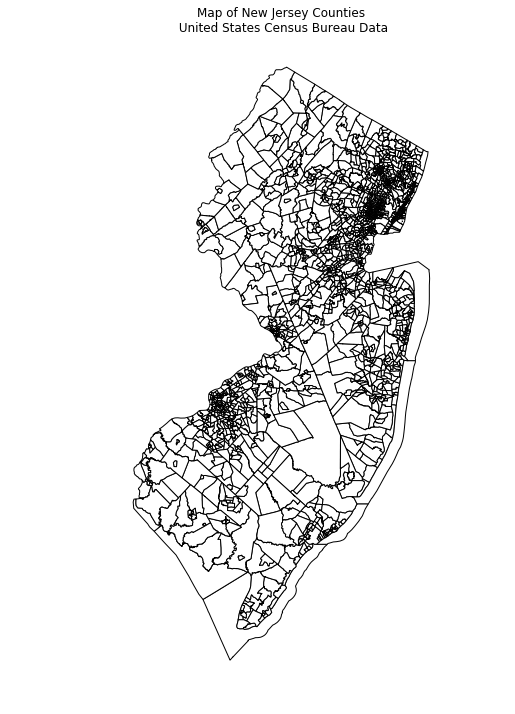

In [32]:
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
geodata.plot(ax = ax, facecolor='white',edgecolor='black')

# Add title to map
ax.set(title = "Map of New Jersey Counties\n United States Census Bureau Data")

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [33]:
# View the coordinate system
geodata.crs

{'wkid': 102100, 'latestWkid': 3857}